In [98]:
import pandas as pd
import pandas as pan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [99]:
df = pd.read_csv("tsunami_dataset.csv")
print('Tipe Data')
print(df.dtypes)
print('\nData Kosong')
print(df.isna().sum(),'\n')
df.head()

Tipe Data
ID                            int64
YEAR                          int64
MONTH                       float64
DAY                         float64
HOUR                        float64
MINUTE                      float64
LATITUDE                    float64
LONGITUDE                   float64
LOCATION_NAME                object
COUNTRY                      object
REGION                       object
CAUSE                        object
EVENT_VALIDITY               object
EQ_MAGNITUDE                float64
EQ_DEPTH                    float64
TS_INTENSITY                float64
DAMAGE_TOTAL_DESCRIPTION     object
HOUSES_TOTAL_DESCRIPTION     object
DEATHS_TOTAL_DESCRIPTION     object
URL                          object
COMMENTS                     object
dtype: object

Data Kosong
ID                             0
YEAR                           0
MONTH                        104
DAY                          177
HOUR                         951
MINUTE                      1024
LATITUDE 

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS
0,12,-330,NaN,NaN,NaN,NaN,40.00,25.000,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,...,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"330 B.C. Aegean Sea, Sporades Islands, 40 N 25..."
1,481,1764,2.0,11.0,NaN,NaN,51.45,-2.583,"BRISTOL, ENGLAND",UK,...,Unknown,Very Doubtful Tsunami,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"Reference #1894, in full: ""On Saturday the 11t..."
2,71,859,NaN,NaN,NaN,NaN,36.08,36.250,SAMANDAGI,TURKEY,...,Earthquake,Questionable Tsunami,NaN,NaN,3.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"859 (possibly 861), November. Levantian Sea, N..."
3,186,1580,1.0,NaN,NaN,NaN,40.00,128.000,YELLOW SEA,NORTH KOREA,...,Unknown,Very Doubtful Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...
4,5,-1300,NaN,NaN,NaN,NaN,39.96,26.240,"IONIAN COASTS, TROAD",TURKEY,...,Unknown,Questionable Tsunami,6.0,NaN,5.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,1300 B.C. Ionian and Aegean Seas. References t...


### membuang nilai null pada dataset

In [100]:
df=df.dropna()
df

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS
147,325,1678,6.0,18.0,1.0,45.0,-9.000,-79.000,CENTRAL PERU,PERU,...,Earthquake,Probable Tsunami,8.4,40.0,2.5,Severe (~>$5 to $24 million),Many (~101 to 1000 houses),Many (~101 to 1000 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"1678, June 17 (other sources give 8 January) [..."
161,194,1586,7.0,10.0,0.0,30.0,-12.300,-77.700,CENTRAL PERU,PERU,...,Earthquake,Definite Tsunami,8.5,60.0,3.5,Severe (~>$5 to $24 million),Many (~101 to 1000 houses),Few (~1 to 50 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"There was a severe earthquake near Lima, Peru ..."
193,212,1604,11.0,24.0,18.0,30.0,-17.880,-70.940,S. PERU,PERU,...,Earthquake,Definite Tsunami,8.5,30.0,3.5,Severe (~>$5 to $24 million),Many (~101 to 1000 houses),Many (~101 to 1000 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"1604 (erroneously 1605), November 23 or 24 (er..."
247,424,1746,10.0,29.0,3.0,30.0,-11.996,-77.198,CENTRAL PERU,PERU,...,Earthquake,Definite Tsunami,8.0,30.0,3.5,Extreme (~$25 million or more),Very Many (~1001 or more houses),Very Many (~1001 or more people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"On October 28, 1746 (erroneously 1724), at 22:..."
254,315,1674,2.0,17.0,11.0,30.0,-3.750,127.750,BANDA SEA,INDONESIA,...,Earthquake,Definite Tsunami,6.8,40.0,1.5,Severe (~>$5 to $24 million),Many (~101 to 1000 houses),Very Many (~1001 or more people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,2214,1992,12.0,12.0,5.0,29.0,-8.480,121.896,FLORES SEA,INDONESIA,...,Earthquake,Definite Tsunami,7.8,28.0,2.7,Extreme (~$25 million or more),Very Many (~1001 or more houses),Very Many (~1001 or more people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"On December 12, 1992, a magnitude 7.5 Ms (USGS..."
1533,2769,1783,2.0,5.0,12.0,0.0,38.300,15.967,TYRRHENIAN CALABRIA,ITALY,...,Earthquake,Definite Tsunami,6.9,13.0,4.0,Extreme (~$25 million or more),Very Many (~1001 or more houses),Very Many (~1001 or more people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,In 1783 Calabria (southern Italy) was shaken b...
1571,2916,1980,10.0,10.0,12.0,25.0,36.195,1.354,EL ASNAM,ALGERIA,...,Earthquake and Landslide,Definite Tsunami,7.7,10.0,2.0,Extreme (~$25 million or more),Very Many (~1001 or more houses),Very Many (~1001 or more people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,Sergey Soloviev studied this event in a trip t...
1771,3411,1905,9.0,8.0,1.0,43.0,38.670,16.070,TYRRHENIAN CALABRIA,ITALY,...,Earthquake,Definite Tsunami,7.1,15.0,4.0,Extreme (~$25 million or more),Very Many (~1001 or more houses),Many (~101 to 1000 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"1905, September 8 01:43:11 UTC. 38.56 N, 16.07..."


## mencari banyaknya nilai yang unique

In [101]:
print(df.EQ_DEPTH.unique())

[ 40.  60.  30. 100.  33. 160.  25.  15.  50.  20.  47.  38.  48.  74.
  80.  28.  35.  29.  10.  45.  22.   7.   6.  12.  24.  13.  46.  18.
  44.   2.  58.  17.   8.  32.  23.]


In [102]:
print(df.EQ_MAGNITUDE.unique())

[8.4 8.5 8.  6.8 8.3 7.8 7.5 6.3 7.1 7.6 7.4 8.2 8.1 8.7 7.9 8.8 7.  6.6
 7.3 7.2 6.1 6.5 6.9 7.7 6.  6.4 5.5 8.6 9.2 9.5 6.7]


## Menggunakan Algoritma K-Means Clustering

In [103]:
from sklearn.preprocessing import StandardScaler

df_subset = df[['EQ_DEPTH', 'EQ_MAGNITUDE']]
ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)
print (x_scaled)

[[ 3.24152802e-01  1.28341919e+00]
 [ 1.26361362e+00  1.43794031e+00]
 [-1.45577606e-01  1.43794031e+00]
 [-1.45577606e-01  6.65334726e-01]
 [ 3.24152802e-01 -1.18891868e+00]
 [ 3.14253525e+00  1.12889808e+00]
 [-4.65848338e-03  3.56292493e-01]
 [-4.65848338e-03 -1.07270858e-01]
 [-1.45577606e-01 -1.96152426e+00]
 [-4.65848338e-03 -7.25355325e-01]
 [ 5.96091769e+00  6.65334726e-01]
 [ 3.24152802e-01  4.72502589e-02]
 [-4.65848338e-03  6.65334726e-01]
 [-4.65848338e-03 -2.61791975e-01]
 [ 3.14253525e+00 -1.07270858e-01]
 [-4.65848338e-03 -2.61791975e-01]
 [-4.65848338e-03  9.74376960e-01]
 [-3.80442809e-01  1.12889808e+00]
 [-8.50173216e-01  8.19855843e-01]
 [-4.65848338e-03  1.74698254e+00]
 [ 3.24152802e-01  5.10813609e-01]
 [ 7.93883209e-01  4.72502589e-02]
 [-3.80442809e-01  1.90150366e+00]
 [ 3.24152802e-01 -8.79876442e-01]
 [-4.65848338e-03 -1.07270858e-01]
 [-4.65848338e-03 -1.18891868e+00]
 [-8.50173216e-01 -2.61791975e-01]
 [-6.15308013e-01 -1.49796091e+00]
 [ 1.26361362e+00 -4

In [104]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters = 2)
model_kmeans.fit(x_scaled)

KMeans(n_clusters=2)

In [105]:
labels = model_kmeans.labels_
print(labels)

[1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 0 0 0 1]


### Membuat Cross_Tab untuk membandingkan antar cluster

In [106]:
df_kmeans = pd.DataFrame({'labels' : labels, 'CAUSE' : df.CAUSE})

# Buat crosstab
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['CAUSE'])
print(ct1)

CAUSE   Earthquake  Earthquake and Landslide  Volcano and Earthquake
labels                                                              
0               46                         9                       1
1               59                         6                       0


## Melihat Centroid

In [107]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Untuk mengambil semua baris pada kolom tertentu (berbentuk array)
xs = x_scaled[:,0]
ys = x_scaled[:,1]

# Menampung koordinat dari semua centroid
centroids = model_kmeans.cluster_centers_

#Pisahkan centroid koordinat x dan y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

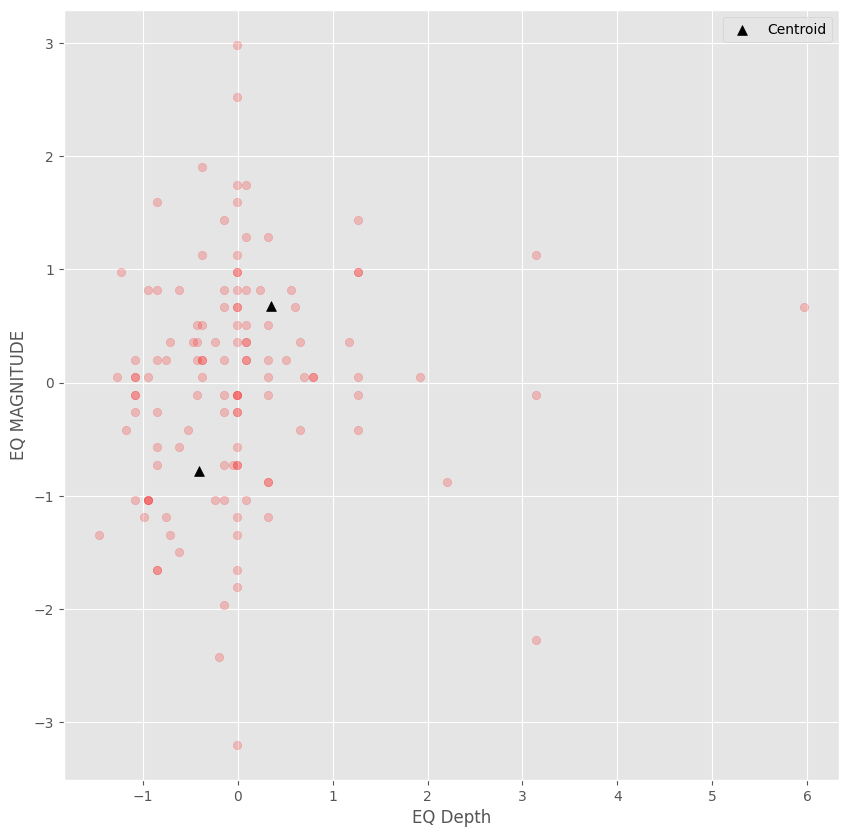

In [108]:
# Visualisasi Cluster
plt.figure(figsize=(10,10))

# Titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, c='red', alpha=0.2)

# Titik-titik centroid
plt.scatter(centroids_x, centroids_y, c='black', label = 'Centroid', marker="^", s=50)

# Beri label
plt.xlabel("EQ Depth")
plt.ylabel("EQ MAGNITUDE")

plt.legend()
plt.show()

## Membuat Dendogram

In [109]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [110]:
# Buat struktur hirarki nya
merge = linkage(x_scaled, method="ward")
merge

array([[1.60000000e+01, 1.10000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.50000000e+01, 4.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.20000000e+01, 1.02000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.30000000e+01, 3.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.10000000e+01, 1.05000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.90000000e+01, 6.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.70000000e+01, 8.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 2.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [9.00000000e+00, 4.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [9.70000000e+01, 1.28000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [7.50000000e+01, 1.04000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.30000000e+01, 8.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.50000000e+01, 1.00000000e+02, 0.00000000e

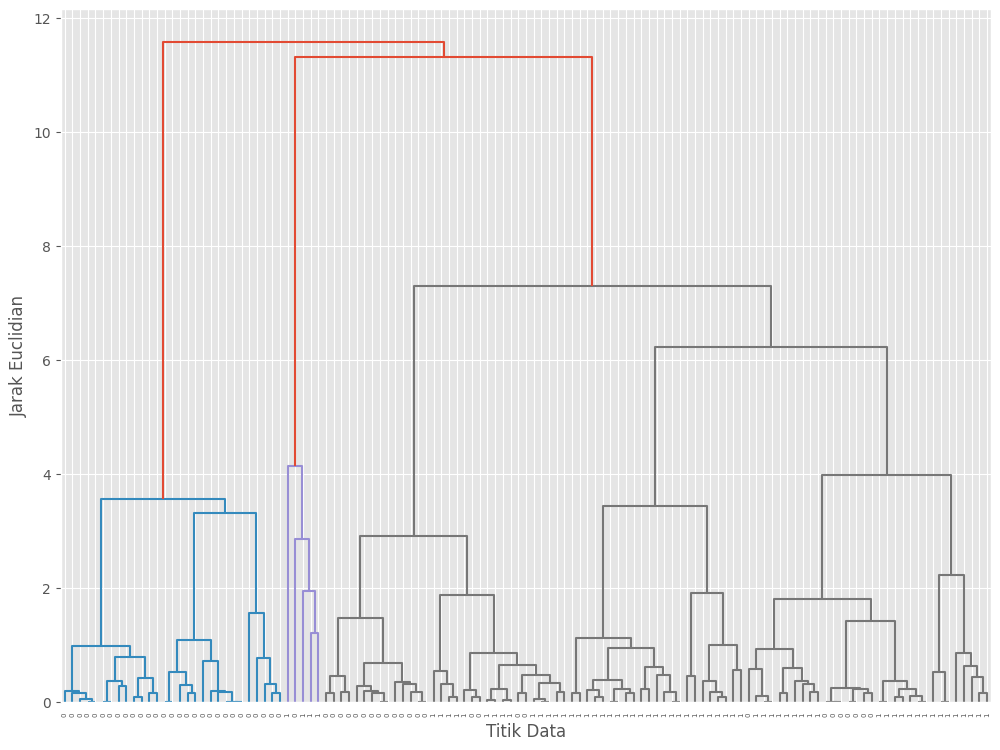

In [114]:
# Visualisasi
plt.figure(figsize=(12,9))
dendrogram(merge, labels = labels)
plt.xlabel("Titik Data")
plt.ylabel("Jarak Euclidian")
plt.show()

### Menggunakan Clustering Hierarki (Hierarchical)

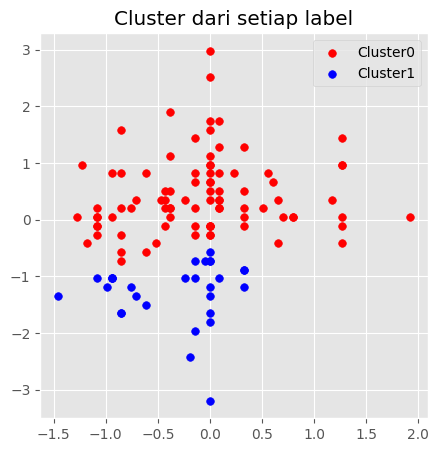

In [118]:
from sklearn.cluster import AgglomerativeClustering

hc_cluster = AgglomerativeClustering(n_clusters = 3)
agg_cluster = hc_cluster.fit_predict(x_scaled)
plt.figure(figsize=(5,5))

plt.scatter(x_scaled[agg_cluster == 0, 0],
           x_scaled[agg_cluster == 0, 1],
           c = 'red', s = 30, label = 'Cluster0')

plt.scatter(x_scaled[agg_cluster == 1, 0],
           x_scaled[agg_cluster == 1, 1],
           c = 'blue', s = 30, label = 'Cluster1')

plt.title("Cluster dari setiap label")
plt.legend()
plt.show()